In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dacon/train.csv',index_col=0)
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dacon/test.csv',index_col=0)
submission = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dacon/submission.csv',index_col=0)

In [ ]:
train.shape

(2048, 786)

In [ ]:
train.head()

,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,1,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,2,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,1,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,4,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,2,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [ ]:
test.shape

(20480, 785)

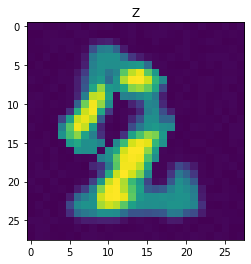

9


In [ ]:
import random
rndidx = random.randint(0,2048)

img = np.array(train.iloc[rndidx,2:]).reshape(28,28).astype(np.float32)
plt.title(train.iloc[rndidx,1])
plt.imshow(img)
plt.show()
print(train.iloc[rndidx,0])

In [ ]:
from keras.utils.np_utils import to_categorical
x_train = np.array(train.iloc[:,2:]).reshape(-1,28,28,1).astype(np.float32)
y_train = to_categorical(train['digit'].values)

x_train = x_train/255.

x_train.shape, y_train.shape

((2048, 28, 28, 1), (2048, 10))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1)

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [ ]:
from tensorflow.keras import activations
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1),padding='same'))
model.add(keras.layers.Conv2D(32, kernel_size = 3,use_bias=False,padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activations.relu))

model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',padding='same'))
model.add(keras.layers.Conv2D(64, kernel_size = 3,use_bias=False,padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activations.relu))
model.add(keras.layers.MaxPooling2D((2,2)))


model.add(keras.layers.Conv2D(128, kernel_size = 3, activation='relu',padding='same'))
model.add(keras.layers.Conv2D(128, kernel_size = 3,use_bias=False,padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activations.relu))


model.add(keras.layers.Conv2D(256, kernel_size = 3, activation='relu',padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size = 3,use_bias=False,padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activations.relu))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(256, kernel_size = 3, activation='relu',padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
# model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu'))
# model.add(keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model.add(keras.layers.Dropout(0.4))

# model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
# model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
# model.add(keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model.add(keras.layers.Dropout(0.4))

# model.add(keras.layers.Conv2D(128, kernel_size = 4, activation='relu'))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dropout(0.4))
# model.add(keras.layers.Dense(10, activation='softmax'))

# # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
annealer = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

model.compile(optimizer = keras.optimizers.Adam(), loss = 'categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs = 50,
    steps_per_epoch = x_train.shape[0]//32,
    validation_data = (x_val, y_val),
    callbacks = [annealer],
    verbose=1
)


Epoch 1/50
57/57 [==============================] - 1s 21ms/step - loss: 2.6329 - accuracy: 0.1717 - val_loss: 2.3647 - val_accuracy: 0.0976
Epoch 2/50
57/57 [==============================] - 1s 16ms/step - loss: 1.8206 - accuracy: 0.3440 - val_loss: 2.5715 - val_accuracy: 0.0976
Epoch 3/50
57/57 [==============================] - 1s 16ms/step - loss: 1.6295 - accuracy: 0.4202 - val_loss: 3.6520 - val_accuracy: 0.0976
Epoch 4/50
57/57 [==============================] - 1s 16ms/step - loss: 1.4197 - accuracy: 0.5086 - val_loss: 4.5559 - val_accuracy: 0.0976
Epoch 5/50
57/57 [==============================] - 1s 16ms/step - loss: 1.2497 - accuracy: 0.5732 - val_loss: 6.3653 - val_accuracy: 0.0976
Epoch 6/50
57/57 [==============================] - 1s 16ms/step - loss: 1.0726 - accuracy: 0.6267 - val_loss: 5.4888 - val_accuracy: 0.0976
Epoch 7/50
57/57 [==============================] - 1s 16ms/step - loss: 0.9783 - accuracy: 0.6516 - val_loss: 4.9381 - val_accuracy: 0.0976
Epoch 8/50
57